<H1>Import libraries</H1>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score


<h1>How k-means works</h1>

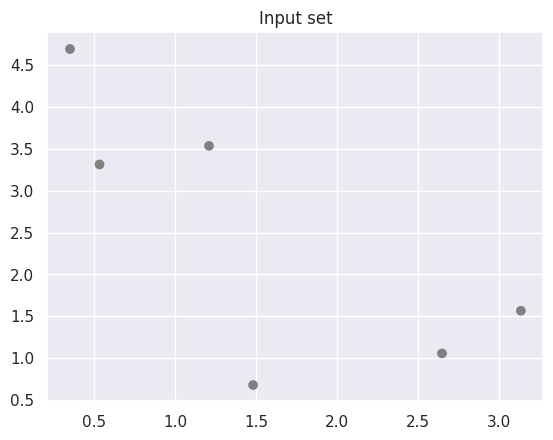

In [2]:
df_dample = pd.DataFrame({'x_axis':[3.136885,1.481533,0.349872,0.532377,2.649282,1.209101], 'y_axis':[1.565928,0.678754,4.692533,3.313389,1.056135,3.535665],'set_number':[0,0,0,0,0,0]})

cmap4 = colors.ListedColormap(["grey", "blue", "red", "green", "black", "magenta", "pink", "brown"])
plt.scatter(df_dample['x_axis'], df_dample['y_axis'], c=df_dample['set_number'],cmap=cmap4)
plt.title("Input set")
plt.show()

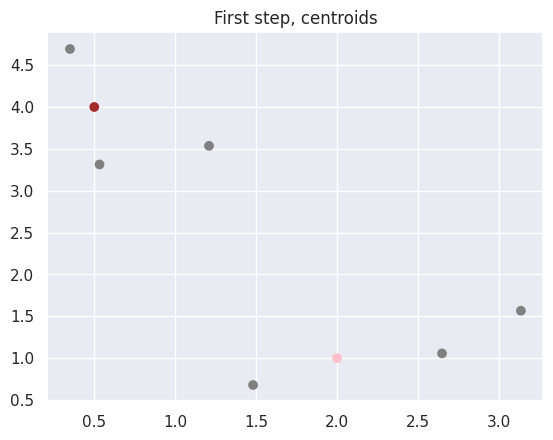

In [3]:
df_dample = pd.DataFrame({'x_axis':[3.136885,1.481533,0.349872,0.532377,2.649282,1.209101, 2,0.5], 'y_axis':[1.565928,0.678754,4.692533,3.313389,1.056135,3.535665,1,4],'set_number':[0,0,0,0,0,0,3,4]})

cmap4 = colors.ListedColormap(["grey", "blue", "red", "green", "black", "magenta", "pink", "brown"])
plt.scatter(df_dample['x_axis'], df_dample['y_axis'], c=df_dample['set_number'],cmap=cmap4)
plt.title("First step, centroids")
plt.show()

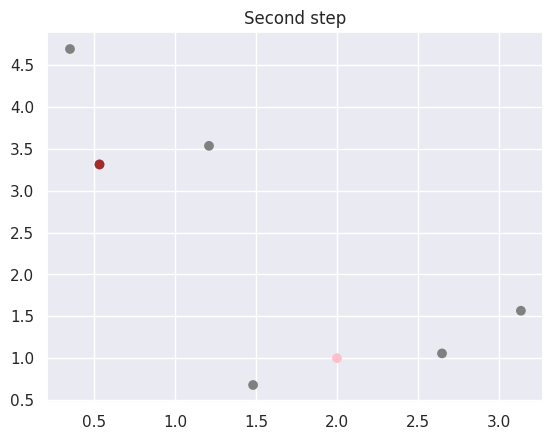

In [4]:
df_dample = pd.DataFrame({'x_axis':[3.136885,1.481533,0.349872,0.532377,2.649282,1.209101, 2,0.532377], 'y_axis':[1.565928,0.678754,4.692533,3.313389,1.056135,3.535665,1,3.313389],'set_number':[0,0,0,0,0,0,3,4]})

cmap4 = colors.ListedColormap(["grey", "blue", "red", "green", "black", "magenta", "pink", "brown"])
plt.scatter(df_dample['x_axis'], df_dample['y_axis'], c=df_dample['set_number'],cmap=cmap4)
plt.title("Second step")
plt.show()

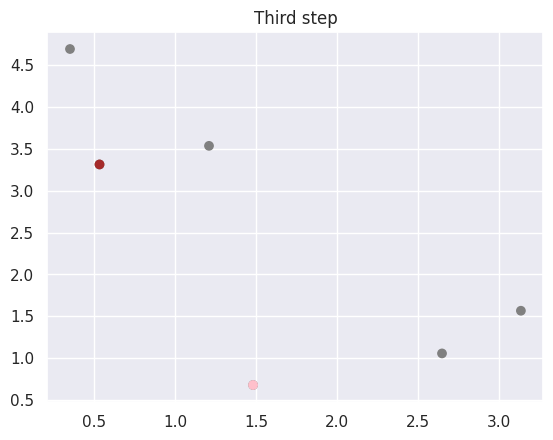

In [5]:
df_dample = pd.DataFrame({'x_axis':[3.136885,1.481533,0.349872,0.532377,2.649282,1.209101, 1.481533,0.532377], 'y_axis':[1.565928,0.678754,4.692533,3.313389,1.056135,3.535665,0.678754,3.313389],'set_number':[0,0,0,0,0,0,3,4]})

cmap4 = colors.ListedColormap(["grey", "blue", "red", "green", "black", "magenta", "pink", "brown"])
plt.scatter(df_dample['x_axis'], df_dample['y_axis'], c=df_dample['set_number'],cmap=cmap4)
plt.title("Third step")
plt.show()

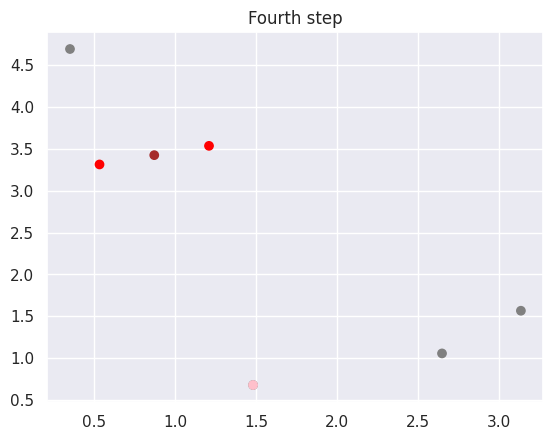

In [6]:
df_dample = pd.DataFrame({'x_axis':[3.136885,1.481533,0.349872,0.532377,2.649282,1.209101, 1.481533,0.8707389], 'y_axis':[1.565928,0.678754,4.692533,3.313389,1.056135,3.535665,0.678754,3.424527],'set_number':[0,0,0,1,0,1,3,4]})

cmap4 = colors.ListedColormap(["grey", "blue", "red", "green", "black", "magenta", "pink", "brown"])
plt.scatter(df_dample['x_axis'], df_dample['y_axis'], c=df_dample['set_number'],cmap=cmap4)
plt.title("Fourth step")
plt.show()

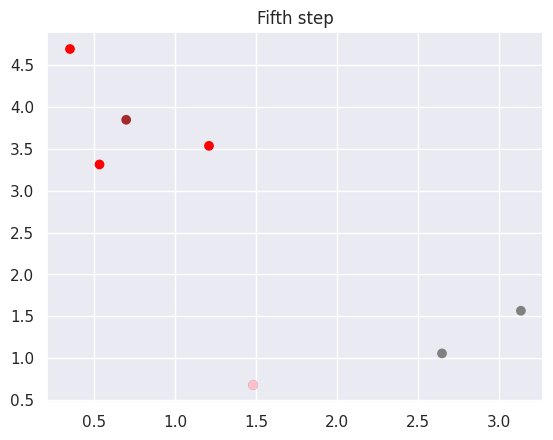

In [7]:
df_dample = pd.DataFrame({'x_axis':[3.136885,1.481533,0.349872,0.532377,2.649282,1.209101, 1.481533,0.69711666], 'y_axis':[1.565928,0.678754,4.692533,3.313389,1.056135,3.535665,0.678754,3.8471956],'set_number':[0,0,1,1,0,1,3,4]})

cmap4 = colors.ListedColormap(["grey", "blue", "red", "green", "black", "magenta", "pink", "brown"])
plt.scatter(df_dample['x_axis'], df_dample['y_axis'], c=df_dample['set_number'],cmap=cmap4)
plt.title("Fifth step")
plt.show()

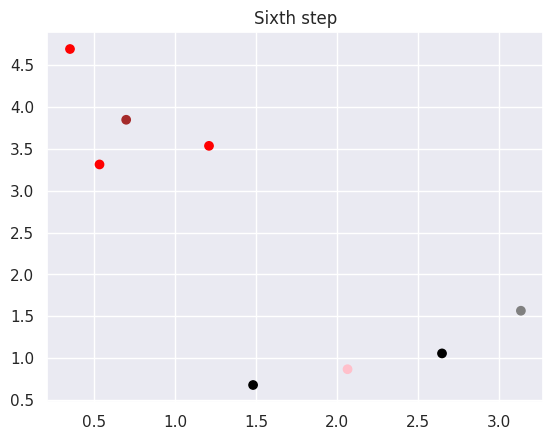

In [8]:
df_dample = pd.DataFrame({'x_axis':[3.136885,1.481533,0.349872,0.532377,2.649282,1.209101, 2.0654075,0.69711666], 'y_axis':[1.565928,0.678754,4.692533,3.313389,1.056135,3.535665,0.8674445,3.8471956],'set_number':[0,2,1,1,2,1,3,4]})

cmap4 = colors.ListedColormap(["grey", "blue", "red", "green", "black", "magenta", "pink", "brown"])
plt.scatter(df_dample['x_axis'], df_dample['y_axis'], c=df_dample['set_number'],cmap=cmap4)
plt.title("Sixth step")
plt.show()

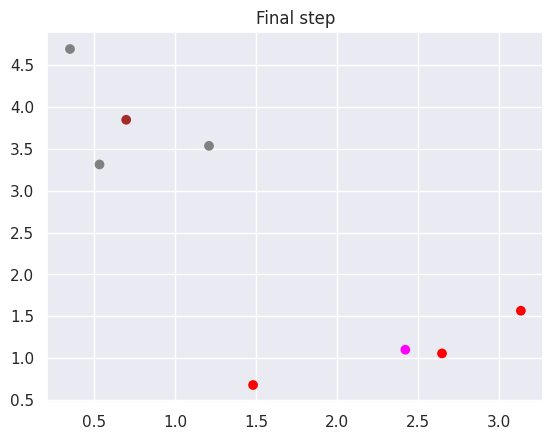

In [9]:
df_dample = pd.DataFrame({'x_axis':[3.136885,1.481533,0.349872,0.532377,2.649282,1.209101, 2.4225666,0.69711666], 'y_axis':[1.565928,0.678754,4.692533,3.313389,1.056135,3.535665,1.10027233,3.8471956],'set_number':[2,2,1,1,2,1,3,4]})

cmap4 = colors.ListedColormap(["grey", "blue", "red", "green", "black", "magenta", "pink", "brown"])
plt.scatter(df_dample['x_axis'], df_dample['y_axis'], c=df_dample['set_number'],cmap=cmap4)
plt.title("Final step")
plt.show()

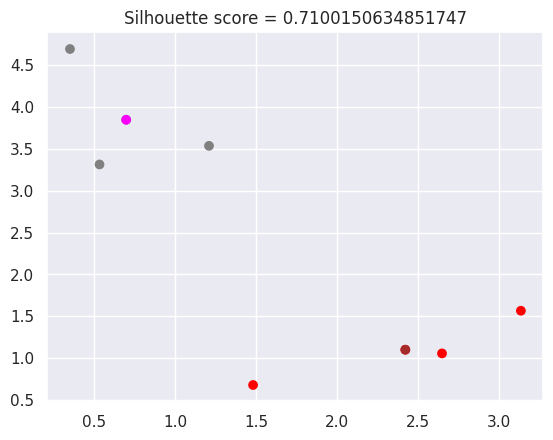

In [10]:
kmeans = KMeans(n_clusters=2, random_state=42)
out = kmeans.fit_predict(df_dample[['x_axis','y_axis']])


score = silhouette_score(df_dample[['x_axis','y_axis']], out )

clusters = pd.DataFrame({'x_axis':df_dample['x_axis'],'y_axis':df_dample['y_axis'],'set_number':kmeans.labels_})
center_sets = pd.DataFrame({'x_axis': kmeans.cluster_centers_[:, 0], 'y_axis': kmeans.cluster_centers_[:, 1],'set_number':[2,3]})

df_res = pd.concat( [clusters, center_sets] )

plt.scatter( df_res['x_axis'], df_res['y_axis'], c=df_res['set_number'],cmap=cmap4)
plt.title("Silhouette score = " + str( score ))
plt.show()

<H2>generate data set for custering</H2> 

,x_axis,y_axis,set_number,set_id
0,0.720868,3.713471,0,0
1,-1.894684,7.968985,3,0
2,1.356789,4.364625,0,0
3,1.053744,4.492869,0,0
4,1.591415,4.904977,0,0
5,0.782607,4.152636,0,0
6,-1.957517,3.872915,2,0
7,-0.773545,7.879236,3,0
8,0.123135,5.279175,0,0
9,-1.432847,7.715770,3,0


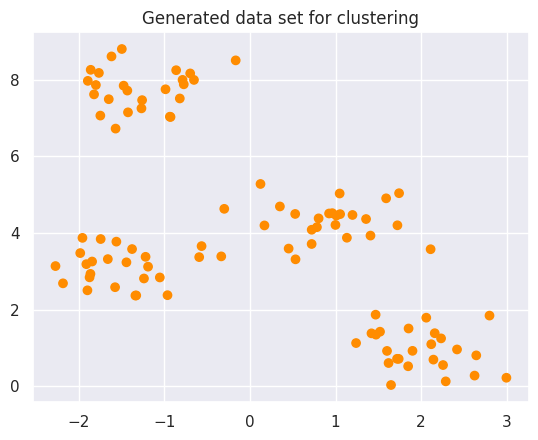

In [32]:
number_sets_to_generate = 4

X, y = make_blobs(centers=number_sets_to_generate, cluster_std=0.5, random_state=0)
generated_2_sets = pd.DataFrame({'x_axis': X[:, 0], 'y_axis': X[:, 1],'set_number':y})
generated_2_sets['set_id'] = 0
display( generated_2_sets.head( 10 ) )
cmap4 = colors.ListedColormap(["darkorange", "gold", "lawngreen", "lightseagreen", "red", "blue","magenta", "black", "pink", "brown"])
plt.scatter(generated_2_sets['x_axis'], generated_2_sets['y_axis'], c=generated_2_sets['set_id'],cmap=cmap4)
plt.title("Generated data set for clustering")
plt.show()



<H2>split on train and test set</H2>

In [12]:
X_train, X_test, y_train, y_test = train_test_split(generated_2_sets[['x_axis','y_axis']], generated_2_sets[['set_number']], test_size=0.33, random_state=0)

<H2>run kmeans algorithm</H2>

In [13]:
kmeans = KMeans(n_clusters = number_sets_to_generate, random_state = 0, n_init='auto')
kmeans.fit(X_train)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


<H2>Plot the results</H2>

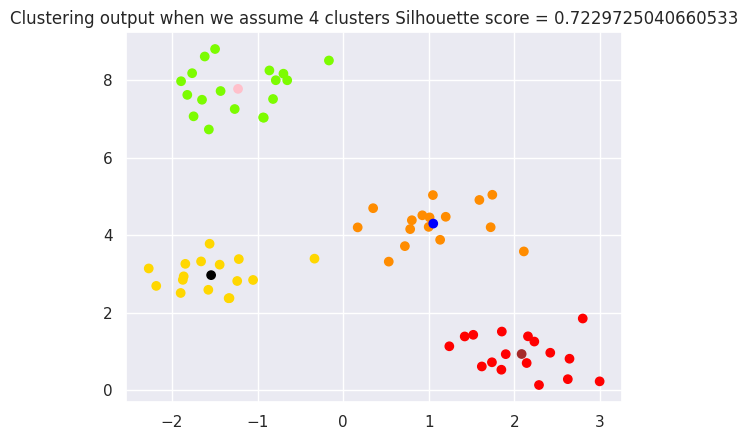

In [19]:
clusters_num = range(number_sets_to_generate,2*number_sets_to_generate,1)

clusters = pd.DataFrame({'x_axis':X_train['x_axis'],'y_axis':X_train['y_axis'],'set_number':kmeans.labels_})
center_sets = pd.DataFrame({'x_axis': kmeans.cluster_centers_[:, 0], 'y_axis': kmeans.cluster_centers_[:, 1],'set_number':clusters_num})

df_res = pd.concat( [clusters, center_sets] )

silhouette_4 = silhouette_score(clusters[['x_axis','y_axis']], kmeans.labels_ )

plt.scatter( df_res['x_axis'], df_res['y_axis'], c=df_res['set_number'],cmap=cmap4)
plt.title("Clustering output when we assume 4 clusters Silhouette score = " + str( silhouette_4 ) ) 
plt.show()

<H2>For 3 clusters</H2>

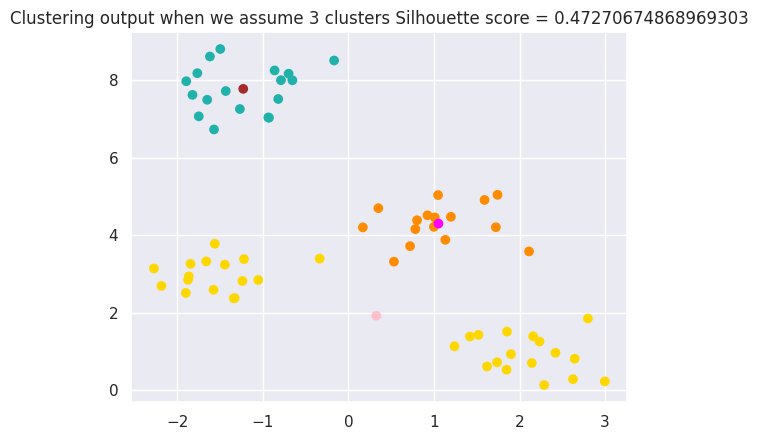

In [20]:
number_clusters = 3
kmeans_3 = KMeans(n_clusters = number_clusters, random_state = 0, n_init='auto')
kmeans_3.fit(X_train)

clusters_num = range(number_sets_to_generate,number_sets_to_generate+number_clusters,1)

clusters = pd.DataFrame({'x_axis':X_train['x_axis'],'y_axis':X_train['y_axis'],'set_number':kmeans_3.labels_})
center_sets = pd.DataFrame({'x_axis': kmeans_3.cluster_centers_[:, 0], 'y_axis': kmeans_3.cluster_centers_[:, 1],'set_number':clusters_num})

df_res = pd.concat( [clusters, center_sets] )

silhouette_3 = silhouette_score(clusters[['x_axis','y_axis']], kmeans_3.labels_ )

plt.scatter( df_res['x_axis'], df_res['y_axis'], c=df_res['set_number'],cmap=cmap4)
plt.title("Clustering output when we assume 3 clusters Silhouette score = " + str( silhouette_3 ) )
plt.show()


<H2>For 5 clusters</H2>

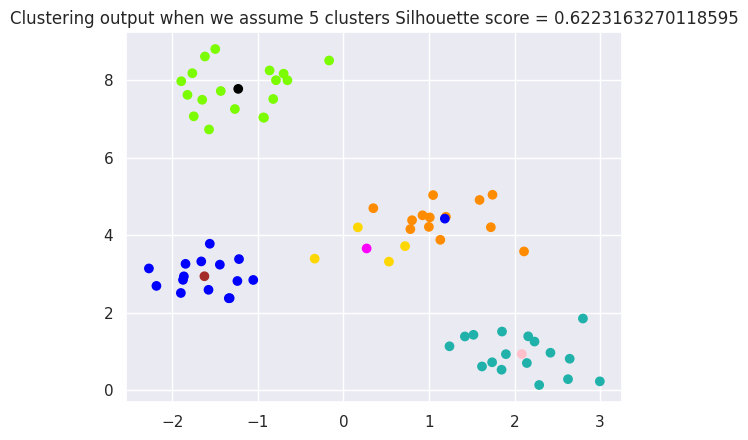

In [21]:
number_clusters = 5
kmeans_5 = KMeans(n_clusters = number_clusters, random_state = 0, n_init='auto')
kmeans_5.fit(X_train)

clusters_num = range(number_sets_to_generate,number_sets_to_generate+number_clusters,1)

clusters = pd.DataFrame({'x_axis':X_train['x_axis'],'y_axis':X_train['y_axis'],'set_number':kmeans_5.labels_})
center_sets = pd.DataFrame({'x_axis': kmeans_5.cluster_centers_[:, 0], 'y_axis': kmeans_5.cluster_centers_[:, 1],'set_number':clusters_num})

df_res = pd.concat( [clusters, center_sets] )

silhouette_5 = silhouette_score(clusters[['x_axis','y_axis']], kmeans_5.labels_ )

plt.scatter( df_res['x_axis'], df_res['y_axis'], c=df_res['set_number'],cmap=cmap4)
plt.title("Clustering output when we assume 5 clusters Silhouette score = " + str( silhouette_5 ) )
plt.show()

<H2>For 6 clusters</H2>

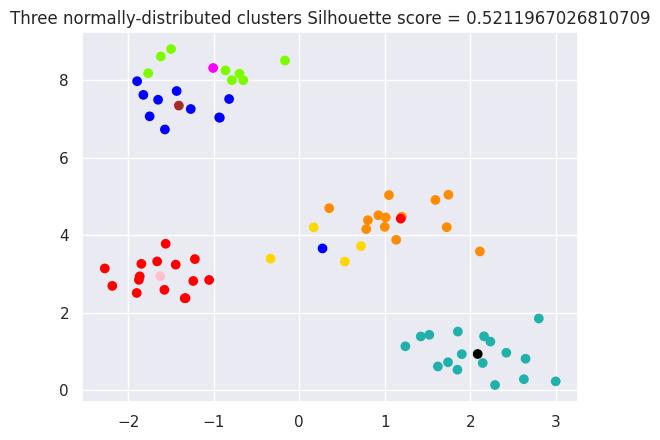

In [22]:
number_clusters = 6
kmeans_6 = KMeans(n_clusters = number_clusters, random_state = 0, n_init='auto')
kmeans_6.fit(X_train)

clusters_num = range(number_sets_to_generate,number_sets_to_generate+number_clusters,1)

clusters = pd.DataFrame({'x_axis':X_train['x_axis'],'y_axis':X_train['y_axis'],'set_number':kmeans_6.labels_})
center_sets = pd.DataFrame({'x_axis': kmeans_6.cluster_centers_[:, 0], 'y_axis': kmeans_6.cluster_centers_[:, 1],'set_number':clusters_num})

df_res = pd.concat( [clusters, center_sets] )

silhouette_6 = silhouette_score(clusters[['x_axis','y_axis']], kmeans_6.labels_ )

plt.scatter( df_res['x_axis'], df_res['y_axis'], c=df_res['set_number'],cmap=cmap4)
plt.title("Three normally-distributed clusters Silhouette score = " + str( silhouette_6 ) )
plt.show()

<H2>How to get proper number of clusters?</H2>

<H2>Calinski Harabasz score</H2>

,clusters_number,calinski_metrix
0,3,82.007079
1,4,384.366654
2,5,320.449922
3,6,306.529545


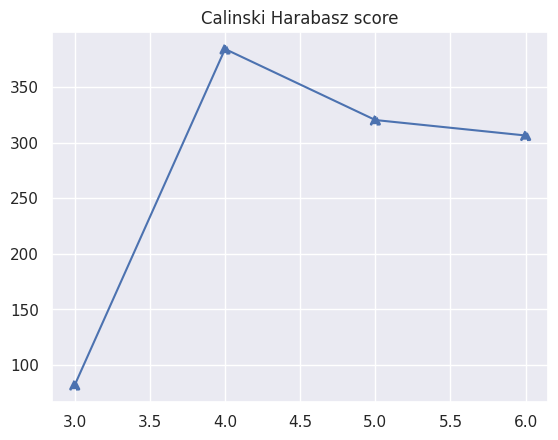

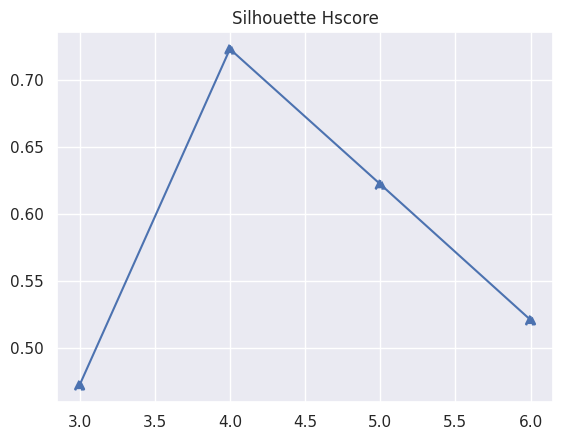

In [24]:
ch_index = calinski_harabasz_score(X_train, kmeans.labels_)
ch_index_3 = calinski_harabasz_score(X_train, kmeans_3.labels_)
ch_index_5 = calinski_harabasz_score(X_train, kmeans_5.labels_)
ch_index_6 = calinski_harabasz_score(X_train, kmeans_6.labels_)

calinski_score = pd.DataFrame({'clusters_number':[3,4,5,6],'calinski_metrix':[ch_index_3,ch_index,ch_index_5,ch_index_6],})
silhouette_score_a = pd.DataFrame({'clusters_number':[3,4,5,6],'silhouette_metrix':[silhouette_3,silhouette_4, silhouette_5,silhouette_6],})

display( calinski_score )

plt.scatter( calinski_score['clusters_number'], calinski_score['calinski_metrix'], marker='^', ls='--', c='b', lw=2 )
plt.plot(calinski_score['clusters_number'], calinski_score['calinski_metrix'])
plt.title("Calinski Harabasz score")
plt.show()

plt.scatter( silhouette_score_a['clusters_number'], silhouette_score_a['silhouette_metrix'], marker='^', ls='--', c='b', lw=2 )
plt.plot(silhouette_score_a['clusters_number'], silhouette_score_a['silhouette_metrix'])
plt.title("Silhouette Hscore")
plt.show()

<H2>lt's normalize variables</H2>

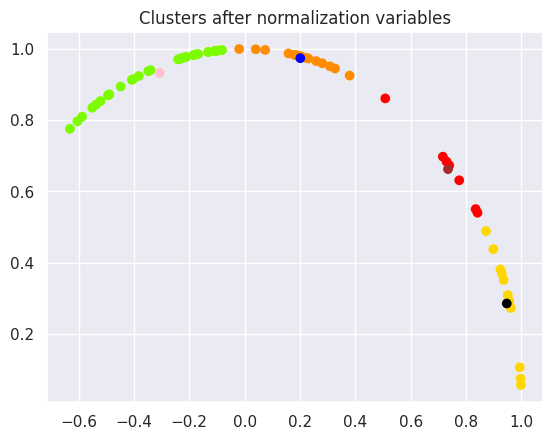

In [27]:
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

kmeans_norm = KMeans(n_clusters = 4, random_state = 0, n_init='auto')
kmeans_norm.fit(X_train_norm)

clusters_num = [4,5,6,7]

clusters = pd.DataFrame({'x_axis':X_train_norm[:, 0],'y_axis':X_train_norm[:, 1],'set_number':kmeans_norm.labels_})
center_sets = pd.DataFrame({'x_axis': kmeans_norm.cluster_centers_[:, 0], 'y_axis': kmeans_norm.cluster_centers_[:, 1],'set_number':clusters_num})

df_res = pd.concat( [clusters, center_sets] )

plt.scatter( df_res['x_axis'], df_res['y_axis'], c=df_res['set_number'],cmap=cmap4)
plt.title("Clusters after normalization variables")
plt.show()


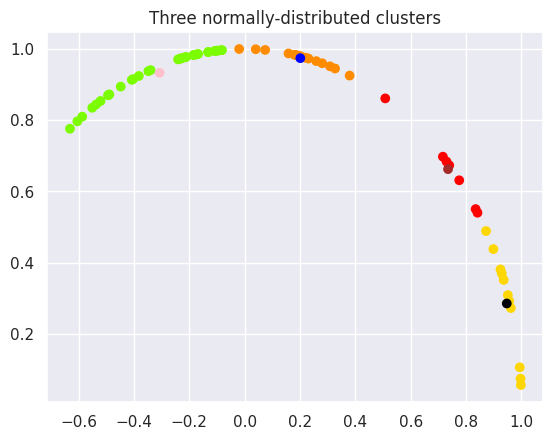

In [26]:
#clusters_num = [3,4,5]






In [28]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt

In [35]:
iris = load_iris()
X = iris.data[:, :4]

,clusters_number,calinski_metrix
0,2,513.924546
1,3,561.593732
2,4,529.196659
3,5,495.541488
4,6,426.118475


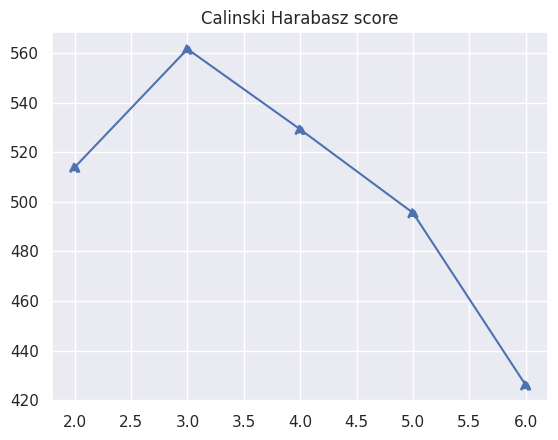

In [36]:
number_clusters = 2
kmeans_ir_2 = KMeans(n_clusters=number_clusters, random_state=30)
kmeans_ir_2.fit_predict(X)
ch_index_ir_2 = calinski_harabasz_score(X, kmeans_ir_2.labels_)

number_clusters = 3
kmeans_ir_3 = KMeans(n_clusters=number_clusters, random_state=30)
kmeans_ir_3.fit_predict(X)
ch_index_ir_3 = calinski_harabasz_score(X, kmeans_ir_3.labels_)

number_clusters = 4
kmeans_ir_4 = KMeans(n_clusters=number_clusters, random_state=30)
kmeans_ir_4.fit_predict(X)
ch_index_ir_4 = calinski_harabasz_score(X, kmeans_ir_4.labels_)

number_clusters = 5
kmeans_ir_5 = KMeans(n_clusters=number_clusters, random_state=30)
kmeans_ir_5.fit_predict(X)
ch_index_ir_5 = calinski_harabasz_score(X, kmeans_ir_5.labels_)

number_clusters = 6
kmeans_ir_6 = KMeans(n_clusters=number_clusters, random_state=30)
kmeans_ir_6.fit_predict(X)
ch_index_ir_6 = calinski_harabasz_score(X, kmeans_ir_6.labels_)

calinski_score_ir = pd.DataFrame({'clusters_number':[2,3,4,5,6],'calinski_metrix':[ch_index_ir_2,ch_index_ir_3,ch_index_ir_4,ch_index_ir_5,ch_index_ir_6]})

display( calinski_score_ir )

plt.scatter( calinski_score_ir['clusters_number'], calinski_score_ir['calinski_metrix'], marker='^', ls='--', c='b', lw=2 )
plt.plot(calinski_score_ir['clusters_number'], calinski_score_ir['calinski_metrix'])
plt.title("Calinski Harabasz score")
plt.show()



In [43]:
df_iris = pd.DataFrame({'sepal_length': X[:, 0], 'sepal_width': X[:, 1], 'petal_length': X[:, 2],'etal_width': X[:, 3], 'cluster_label':kmeans_ir_3.labels_, 'target':iris.target})

df_iris['target_name'] = df_iris.apply(lambda row: iris.target_names[int(row['target'])], axis=1)

#display( df_iris )

grouped = df_iris.groupby(['cluster_label', 'target_name']).agg({ 'sepal_length': 'count', })

grouped

sepal_length
cluster_label target_name              
0             versicolor             47
              virginica              14
1             setosa                 50
2             versicolor              3
              virginica              36

In [33]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
(1.481533+2.649282+3.136885)/3

In [ ]:
(0.678754+1.056135+1.565928)/3